# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read Data

In [2]:
df_train = pd.read_csv('data_train.csv')
df_test = pd.read_csv('data_test.csv')

In [3]:
display(df_train.head())
display(df_test.head())

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,diesel,1.6,universal,False,owned,front,True,17,38,67,13150.0
1,Renault,manual,brown,149000,2012,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,3,100,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,gasoline,1.6,hatchback,False,owned,front,False,5,10,91,12200.0
3,Opel,automatic,other,255100,2007,gasoline,gasoline,1.8,hatchback,False,owned,front,False,10,4,91,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,gasoline,2.0,sedan,False,owned,front,True,5,7,62,3000.0


,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,BMW,automatic,white,115000,2012,gasoline,gasoline,4.4,sedan,False,owned,all,True,32,104,146,20450.0
1,Mercedes-Benz,manual,other,500000,1999,diesel,diesel,2.2,sedan,False,owned,rear,False,7,9,147,2600.0
2,Fiat,manual,silver,210000,2002,gasoline,gasoline,1.2,hatchback,False,owned,front,True,16,7,27,2900.0
3,Mitsubishi,automatic,violet,294000,2000,diesel,diesel,3.2,suv,False,owned,all,True,10,2,48,7500.0
4,Opel,automatic,blue,244000,1998,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,10,116,2200.0


# Basic Data Quality Checks

In [4]:
df_train.shape

(50000, 17)

In [5]:
df_test.shape

(27000, 17)

In [6]:
df_train.columns

Index(['manufacturer_name', 'transmission', 'color', 'odometer_value',
       'year_produced', 'engine_fuel', 'engine_type', 'engine_capacity',
       'body_type', 'has_warranty', 'ownership', 'type_of_drive',
       'is_exchangeable', 'number_of_photos', 'number_of_maintenance',
       'duration_listed', 'price_usd'],
      dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   manufacturer_name      50000 non-null  object 
 1   transmission           50000 non-null  object 
 2   color                  50000 non-null  object 
 3   odometer_value         50000 non-null  int64  
 4   year_produced          50000 non-null  int64  
 5   engine_fuel            50000 non-null  object 
 6   engine_type            50000 non-null  object 
 7   engine_capacity        49985 non-null  float64
 8   body_type              50000 non-null  object 
 9   has_warranty           50000 non-null  bool   
 10  ownership              50000 non-null  object 
 11  type_of_drive          50000 non-null  object 
 12  is_exchangeable        50000 non-null  bool   
 13  number_of_photos       50000 non-null  int64  
 14  number_of_maintenance  50000 non-null  int64  
 15  du

In [8]:
df_train.info

<bound method DataFrame.info of       manufacturer_name transmission  color  odometer_value  year_produced  \
0            Volkswagen    automatic  black          130000           2016   
1               Renault       manual  brown          149000           2012   
2                   Kia    automatic  brown          110000           2014   
3                  Opel    automatic  other          255100           2007   
4                 Mazda       manual   blue          650000           1999   
...                 ...          ...    ...             ...            ...   
49995              Opel       manual  white          380000           1996   
49996        Volkswagen       manual  green          311213           1994   
49997              Fiat       manual    red          250000           1999   
49998               BMW    automatic   grey          615000           1998   
49999             Volvo    automatic  other          485000           2002   

      engine_fuel engine_type  

In [9]:
df_train.describe(include = "all")

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
count,50000,50000,50000,50000.000000,50000.000000,50000,50000,49985.000000,50000,50000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000
unique,55,2,12,NaN,NaN,6,3,NaN,12,2,3,3,2,NaN,NaN,NaN,NaN
top,Volkswagen,manual,black,NaN,NaN,gasoline,gasoline,NaN,sedan,False,owned,front,False,NaN,NaN,NaN,NaN
freq,5478,33277,9979,NaN,NaN,31255,33324,NaN,16910,49429,48956,36012,32350,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,249219.881980,2002.945620,NaN,NaN,2.056894,NaN,NaN,NaN,NaN,NaN,9.662420,16.256940,80.739440,6654.891274
std,NaN,NaN,NaN,136361.343789,8.067141,NaN,NaN,0.675106,NaN,NaN,NaN,NaN,NaN,6.145263,41.537349,113.606476,6467.096697
min,NaN,NaN,NaN,0.000000,1942.000000,NaN,NaN,0.200000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,1.000000
25%,NaN,NaN,NaN,158000.000000,1998.000000,NaN,NaN,1.600000,NaN,NaN,NaN,NaN,NaN,5.000000,2.000000,23.000000,2100.000000
50%,NaN,NaN,NaN,250000.000000,2003.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,8.000000,5.000000,59.000000,4800.000000
75%,NaN,NaN,NaN,325000.000000,2009.000000,NaN,NaN,2.300000,NaN,NaN,NaN,NaN,NaN,12.000000,16.000000,91.000000,8990.000000


# Data Cleaning

In [10]:
## Checking for Null values

In [11]:
df_train.isnull().sum()

manufacturer_name         0
transmission              0
color                     0
odometer_value            0
year_produced             0
engine_fuel               0
engine_type               0
engine_capacity          15
body_type                 0
has_warranty              0
ownership                 0
type_of_drive             0
is_exchangeable           0
number_of_photos          0
number_of_maintenance     0
duration_listed           0
price_usd                 0
dtype: int64

 15 Null values in engine_capacity on the df_train dataset.

In [12]:
df_test.isnull().sum()

manufacturer_name        0
transmission             0
color                    0
odometer_value           0
year_produced            0
engine_fuel              0
engine_type              0
engine_capacity          5
body_type                0
has_warranty             0
ownership                0
type_of_drive            0
is_exchangeable          0
number_of_photos         0
number_of_maintenance    0
duration_listed          0
price_usd                0
dtype: int64

 5 Null values in engine_capacity on the df_test dataset.

As null values count for a small percentage of the dataset. Droppping Null values simpler and more efficient.

In [13]:
df_train.dropna(subset=['engine_capacity'], inplace=True)
df_train.isnull().sum()

manufacturer_name        0
transmission             0
color                    0
odometer_value           0
year_produced            0
engine_fuel              0
engine_type              0
engine_capacity          0
body_type                0
has_warranty             0
ownership                0
type_of_drive            0
is_exchangeable          0
number_of_photos         0
number_of_maintenance    0
duration_listed          0
price_usd                0
dtype: int64

Null values dropped

In [14]:
df_test.dropna(subset=['engine_capacity'], inplace=True)
df_test.isnull().sum()

manufacturer_name        0
transmission             0
color                    0
odometer_value           0
year_produced            0
engine_fuel              0
engine_type              0
engine_capacity          0
body_type                0
has_warranty             0
ownership                0
type_of_drive            0
is_exchangeable          0
number_of_photos         0
number_of_maintenance    0
duration_listed          0
price_usd                0
dtype: int64

In [15]:
## Verifying

In [16]:
df_train.shape

(49985, 17)

In [17]:
df_test.shape

(26995, 17)

Our data is much cleaner to work on now.

In [18]:
df_train.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,diesel,1.6,universal,False,owned,front,True,17,38,67,13150.0
1,Renault,manual,brown,149000,2012,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,3,100,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,gasoline,1.6,hatchback,False,owned,front,False,5,10,91,12200.0
3,Opel,automatic,other,255100,2007,gasoline,gasoline,1.8,hatchback,False,owned,front,False,10,4,91,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,gasoline,2.0,sedan,False,owned,front,True,5,7,62,3000.0


I notice 'Engine Fuel' & 'Engine Type' are pretty much the data. However, 'Engine Fuel' is more detailed, specifying a subcatagory within gas/gasoline called hybrid-petrol. Therefore we will remove the column 'Engine Capacity'. 

Also I notice that there are two terms decribing the same thing. Which is 'Gas' and 'Gasoline'. Therefore, we will change the term 'Gas' to 'Gasoline' in order to be more fitting.

In [19]:
df_train = df_train.drop("engine_type", axis=1)
df_test = df_test.drop("engine_type", axis=1)
df_train.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,1.6,universal,False,owned,front,True,17,38,67,13150.0
1,Renault,manual,brown,149000,2012,gasoline,1.6,sedan,False,owned,front,False,9,3,100,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,1.6,hatchback,False,owned,front,False,5,10,91,12200.0
3,Opel,automatic,other,255100,2007,gasoline,1.8,hatchback,False,owned,front,False,10,4,91,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,2.0,sedan,False,owned,front,True,5,7,62,3000.0


In [20]:
df_train = df_train.replace('gas', 'gasoline')
df_test = df_test.replace('gas', 'gasoline')

In [21]:
# Verifying
df_train['engine_fuel'].value_counts()

gasoline         33008
diesel           16657
hybrid-petrol      316
hybrid-diesel        4
Name: engine_fuel, dtype: int64

# Exploratory Data Analysis

## Visualizing Numerical Data

In [22]:
# All numeric (float and int) variables in the dataset

In [23]:
df_train_numeric = df_train.select_dtypes(include=['float64', 'int64'])
df_train_numeric.head()

,odometer_value,year_produced,engine_capacity,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,130000,2016,1.6,17,38,67,13150.0
1,149000,2012,1.6,9,3,100,7500.0
2,110000,2014,1.6,5,10,91,12200.0
3,255100,2007,1.8,10,4,91,4950.0
4,650000,1999,2.0,5,7,62,3000.0


In [24]:
# Correlation matrix
cor = df_train_numeric.corr()
cor

,odometer_value,year_produced,engine_capacity,number_of_photos,number_of_maintenance,duration_listed,price_usd
odometer_value,1.000000,-0.491996,0.103935,-0.144305,-0.023346,-0.000696,-0.421754
year_produced,-0.491996,1.000000,0.006843,0.254744,0.007125,-0.016925,0.704525
engine_capacity,0.103935,0.006843,1.000000,0.104773,0.071390,0.074868,0.301269
number_of_photos,-0.144305,0.254744,0.104773,1.000000,0.072288,-0.028092,0.316846
number_of_maintenance,-0.023346,0.007125,0.071390,0.072288,1.000000,0.706213,0.058939
duration_listed,-0.000696,-0.016925,0.074868,-0.028092,0.706213,1.000000,0.035907
price_usd,-0.421754,0.704525,0.301269,0.316846,0.058939,0.035907,1.000000


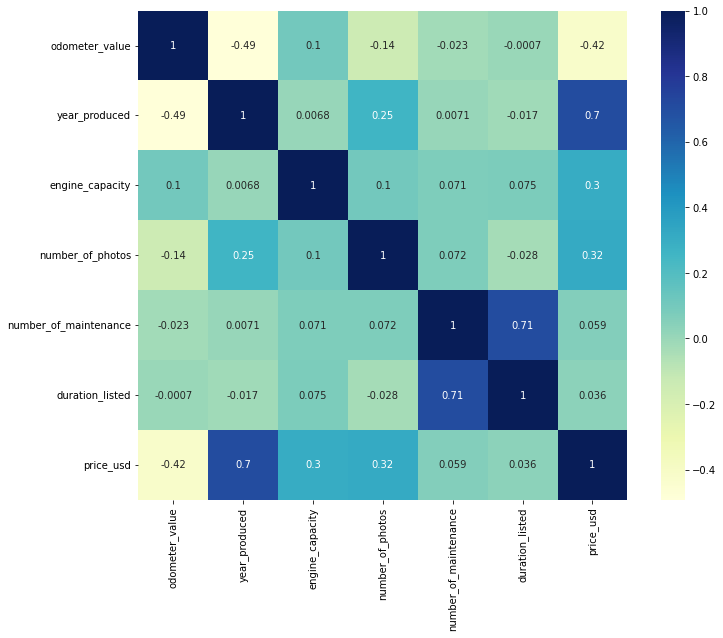

In [25]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cor, square=True, annot = True, cmap="YlGnBu");

We observe that "Price USD" has a :
- Strong positive correlation with "Year Produced".
- Weak positive correlation with "Engine Capacity", and "Number of Photos".
- Moderate negative correlation with "Odometer Value"

## Visualising Categorical Data

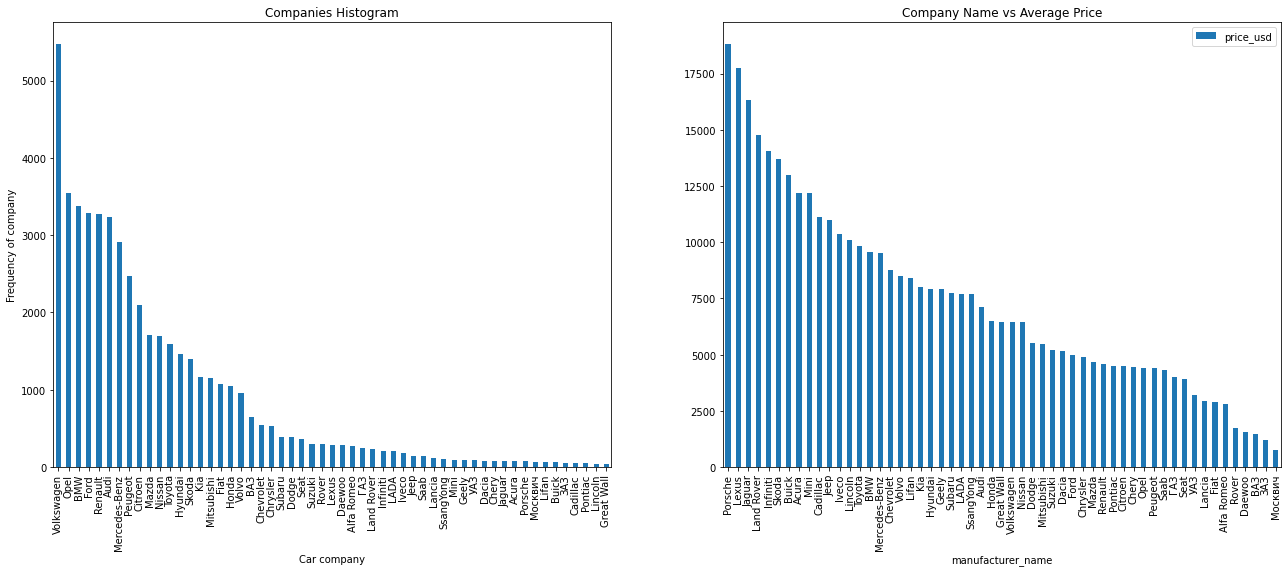

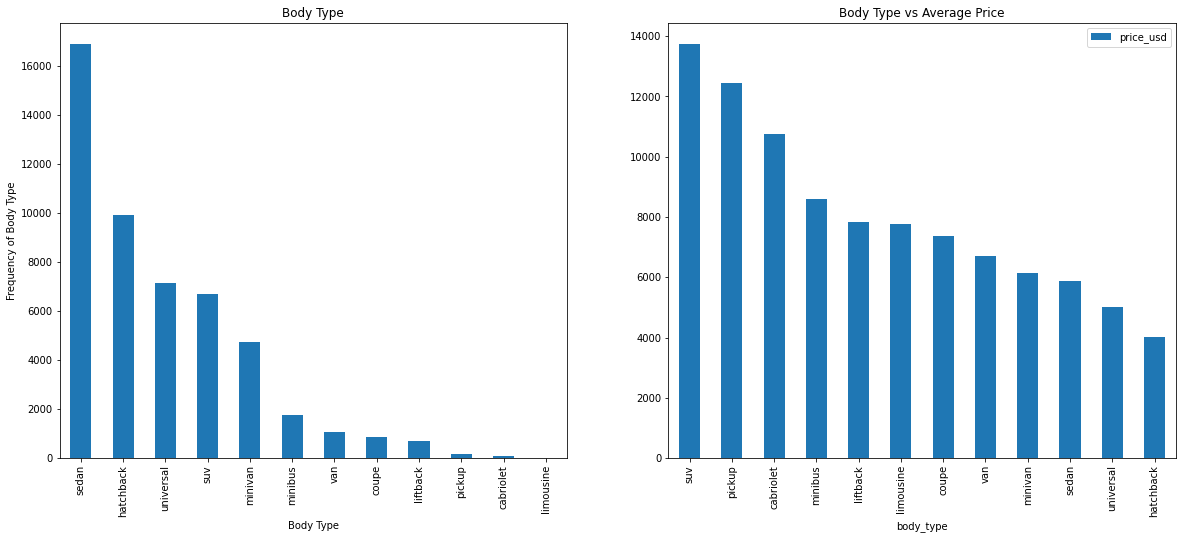

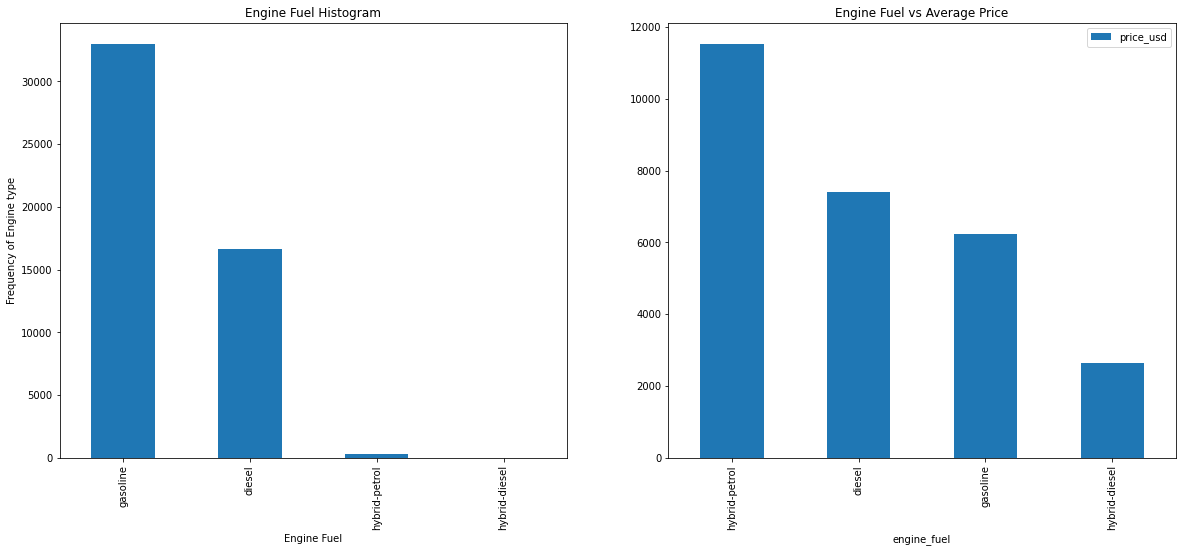

In [26]:
plt.figure(figsize=(22, 18))

plt.subplot(2,2,1)
plt1 = df_train.manufacturer_name.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')


plt.subplot(2,2,2)
df = pd.DataFrame(df_train.groupby(['manufacturer_name'])['price_usd'].mean().sort_values(ascending = False))
df.plot.bar(ax=plt.gca())
plt.title('Company Name vs Average Price')
plt.show()

plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt1 = df_train.body_type.value_counts().plot(kind='bar')
plt.title('Body Type')
plt1.set(xlabel = 'Body Type', ylabel='Frequency of Body Type')

plt.subplot(1,2,2)
df = pd.DataFrame(df_train.groupby(['body_type'])['price_usd'].mean().sort_values(ascending = False))
df.plot.bar(ax=plt.gca())
plt.title('Body Type vs Average Price')
plt.show()


plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt1 = df_train.engine_fuel.value_counts().plot(kind='bar')
plt.title('Engine Fuel Histogram')
plt1.set(xlabel = 'Engine Fuel', ylabel='Frequency of Engine type')

plt.subplot(1,2,2)
df = pd.DataFrame(df_train.groupby(['engine_fuel'])['price_usd'].mean().sort_values(ascending = False))
df.plot.bar(ax=plt.gca())
plt.title('Engine Fuel vs Average Price')
plt.show()


Inference:

- Porsche, Lexus and Jaguar have the highest average prices.
- SUV, Pickup and Cabriolet have the highest average prices.
- Hybrid-petrol vehicles have the highest average prices.


Inference:

- Porsche, Lexus and Jaguar seems to have highest average price.
- Hybrid-petrol vehicles have high average price than both Diesel and Gasoline vehicles.
- SUV and pickups have the highest average price

# Preparing Data for modeling

### Dropping highly correlated variables

According to the correlation heatmap above there is a high correlation between 'Duration listed' & 'Number of maintenance'(0.71). Therefore I will drop the one which is least correlation with 'Price USD'. Which is 'Duration Listed'

In [27]:
df_train = df_train.drop("duration_listed", axis=1)
df_test = df_test.drop("duration_listed", axis=1)
df_train.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,1.6,universal,False,owned,front,True,17,38,13150.0
1,Renault,manual,brown,149000,2012,gasoline,1.6,sedan,False,owned,front,False,9,3,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,1.6,hatchback,False,owned,front,False,5,10,12200.0
3,Opel,automatic,other,255100,2007,gasoline,1.8,hatchback,False,owned,front,False,10,4,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,2.0,sedan,False,owned,front,True,5,7,3000.0


### Checking Outliers

In [28]:
clm = df_train.columns
clm

Index(['manufacturer_name', 'transmission', 'color', 'odometer_value',
       'year_produced', 'engine_fuel', 'engine_capacity', 'body_type',
       'has_warranty', 'ownership', 'type_of_drive', 'is_exchangeable',
       'number_of_photos', 'number_of_maintenance', 'price_usd'],
      dtype='object')

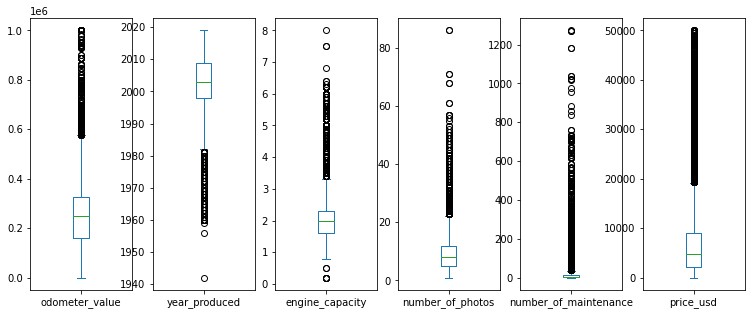

In [29]:
df_train[clm].plot(kind='box',subplots=True,layout=(1,7),figsize=(15,5))
plt.show()

Normally outliers should be handled as it may affect the models. However, this dataset shows collective outliers stacked up together representing a large portion of the dataset. Hence, we will not remove any outliers.

df_train.head()

all_data = pd.concat((df_train.loc[:,'manufacturer_name':'duration_listed'],
                      df_test.loc[:,'manufacturer_name':'duration_listed']))

X_train = all_data[:df_train.shape[0]]
X_test = all_data[df_train.shape[0]:]
y = df_train.price_usd

## Dummy Variables





In [30]:
df_train.shape

(49985, 15)

Shape to check if changes are made after dummy creation

In [31]:
df_train = pd.get_dummies(df_train)

Performing one-hot encoding

In [32]:
enginefuel_oneHot = [c for c in df_train.columns if c.startswith("engine")]
df_train[enginefuel_oneHot].head()

,engine_capacity,engine_fuel_diesel,engine_fuel_gasoline,engine_fuel_hybrid-diesel,engine_fuel_hybrid-petrol
0,1.6,1,0,0,0
1,1.6,0,1,0,0
2,1.6,0,1,0,0
3,1.8,0,1,0,0
4,2.0,0,1,0,0


Observing Engine Fuel variable. One-hot encoding on categorical features seem successful.

Defining a function to generate dummy variables and merging it with data frame. Although we are using the same dataframe, keeping this function incase I would like to create a new dataframe and merge it with df_train.

In [33]:
df_train.shape

(49985, 99)

Results are in. Shape has changed meaning dummies have been successfully created.

In [34]:
df_train.head()

,odometer_value,year_produced,engine_capacity,has_warranty,is_exchangeable,number_of_photos,number_of_maintenance,price_usd,manufacturer_name_Acura,manufacturer_name_Alfa Romeo,...,body_type_sedan,body_type_suv,body_type_universal,body_type_van,ownership_emergency,ownership_new,ownership_owned,type_of_drive_all,type_of_drive_front,type_of_drive_rear
0,130000,2016,1.6,False,True,17,38,13150.0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,149000,2012,1.6,False,False,9,3,7500.0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,110000,2014,1.6,False,False,5,10,12200.0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,255100,2007,1.8,False,False,10,4,4950.0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,650000,1999,2.0,False,True,5,7,3000.0,0,0,...,1,0,0,0,0,0,1,0,1,0


Observing columns to verify if dummies were generated.

# Prediction Type and Modeling Techniques


- 1) Linear Regression
- 2) Nearest Neighbors
- 3) Decision Trees
- 4) Neural Networks
- 5) Random Forest
- 6) Gradient Boosting

# Model Building and Evaluation

## Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_train.loc[:, df_train.columns != 'price_usd'] = scaler.fit_transform(
    df_train.loc[:, df_train.columns != 'price_usd'])

Fitting the scaler to our data before transformation.

In [36]:
df_train.head()

,odometer_value,year_produced,engine_capacity,has_warranty,is_exchangeable,number_of_photos,number_of_maintenance,price_usd,manufacturer_name_Acura,manufacturer_name_Alfa Romeo,...,body_type_sedan,body_type_suv,body_type_universal,body_type_van,ownership_emergency,ownership_new,ownership_owned,type_of_drive_all,type_of_drive_front,type_of_drive_rear
0,-0.874833,1.618931,-0.676781,-0.107496,1.353815,1.194379,0.523388,13150.0,-0.039534,-0.07342,...,-0.715026,-0.392651,2.447434,-0.146625,-0.098572,-0.106732,0.146054,-0.403242,0.623244,-0.403309
1,-0.735477,1.123006,-0.676781,-0.107496,-0.738654,-0.107566,-0.319133,7500.0,-0.039534,-0.07342,...,1.398550,-0.392651,-0.408591,-0.146625,-0.098572,-0.106732,0.146054,-0.403242,0.623244,-0.403309
2,-1.021524,1.370968,-0.676781,-0.107496,-0.738654,-0.758539,-0.150629,12200.0,-0.039534,-0.07342,...,-0.715026,-0.392651,-0.408591,-0.146625,-0.098572,-0.106732,0.146054,-0.403242,0.623244,-0.403309
3,0.042718,0.503099,-0.380528,-0.107496,-0.738654,0.055177,-0.295061,4950.0,-0.039534,-0.07342,...,-0.715026,-0.392651,-0.408591,-0.146625,-0.098572,-0.106732,0.146054,-0.403242,0.623244,-0.403309
4,2.939129,-0.488752,-0.084275,-0.107496,1.353815,-0.758539,-0.222845,3000.0,-0.039534,-0.07342,...,1.398550,-0.392651,-0.408591,-0.146625,-0.098572,-0.106732,0.146054,-0.403242,0.623244,-0.403309


Verifying scaler fit.

##  Splitting the Dataset


We have separated train and test data.

We train the machine learning algorithms, we use part of the training set, usually two-thirds of the train data. Once we train our algorithm using 2/3 of the train data, we start to test our algorithms using the remaining data

The code below, basically splits the train data into 4 parts, X_train, X_test, y_train, y_test.
- X_train, y_train first used to train the algorithm.
- then, X_test is used in that trained algorithms to predict outcomes.
- Once we get the outcomes, we compare it with y_test

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop('price_usd', axis=1), df_train[['price_usd']], 
    test_size=0.33, random_state=42)

Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 


In [38]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((33489, 98), (33489, 1), (16496, 98), (16496, 1))

# _______________________________________________________

# Model Building

We will follow these steps to build a model:

- Choose an algorithm that implements the corresponding technique
- Search for an effective parameter combination for the chosen algorithm
- Create a model using the found parameters
- Train (fit) the model on the training dataset
- Test the model on the test dataset and get the results

### Searching for Effective Parameters


I will examine many parameter combinations and choose the combination that gives the best score. Scikit-Learn provides a useful function for that purpose: GridSearchCV().


Sometimes, when the number of parameter combinations is large, GridSearchCV() can take very long time to run. So in addition to GridSearchCV(), I will sometimes use RandomizedSearchCV() which is similar to GridSearchCV() but instead of using all parameter combinations, it picks a number of random combinations specified by n_iter.

### Performance Metric

For evaluating the performance of our models, I will use mean absolute error (MAE) as requested.

 ## Linear Regression

For Linear Regression, I will choose two algorithmic implementations: Ridge Regression and Elastic Net. I will use the implementations provided in the Scikit-Learn package of these algorithms.

# Modeling

For most of our models I will be using:
- **random_state** = 42 to helps reproduce the same result after reuse the train_test_split.
- **CV** = 5 to reduce bias and ensure that every observation from the original dataset has the chance of appearing in training and test set.
- **n_jobs** = -1 to use maximum computing power that I have. I am running a CPU with 6 cores/12 threads. I have set it to 4 on some models for stability.

## Ridge Regression

Linear least squares with l2 regularization.

- **GridSearchCV()** to search for the best model parameter.
- **alpha** represents the regularization strength.
- **fit_intercept** determines whether to calculate the intercept for this model.
- **Solver** controls which solver to use in the computational routines. I set this to automatically choose the best solver between 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'.

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [42]:

from sklearn.linear_model import Ridge

parameter_space = {
    "alpha": [1, 10, 100, 290, 500, 600, 1000, 2000, 3000],
    "fit_intercept": [True, False],
    "solver": ['auto'],
}

clf = GridSearchCV(Ridge(random_state=42), parameter_space, n_jobs=-1,
                   cv=5, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 2000, 'fit_intercept': True, 'solver': 'auto'}


In [43]:
ridge_model = Ridge(random_state=42, **clf.best_params_)

In [44]:
ridge_model.fit(X_train, y_train);

In [42]:

y_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred)
print("Ridge MAE =", ridge_mae)

Ridge MAE = 2089.1086555695683


## Elastic Net

Linear regression with combined L1 and L2 priors as regularizer.

- **alpha:** Constant that multiplies the penalty terms.
- **l1_ratio:** The ElasticNet mixing parameter. / 0.5 the penalty is a combination of L1 and L2.
- **fit_intercept:** Whether the intercept should be estimated or not.

In [43]:
from sklearn.linear_model import ElasticNet

parameter_space = {
    "alpha": [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.6, 0.8, 1, 10, 100, 500],
    "l1_ratio": [0.5, 1],
    "fit_intercept": [True, False],
}

clf = GridSearchCV(ElasticNet(random_state=42), parameter_space, 
                   n_jobs=-1, cv=5, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 0.15, 'fit_intercept': True, 'l1_ratio': 0.5}


In [44]:
elasticNet_model = ElasticNet(random_state=42, **clf.best_params_)

In [45]:
elasticNet_model.fit(X_train, y_train);

In [46]:
y_pred = elasticNet_model.predict(X_test)
elasticNet_mae = mean_absolute_error(y_test, y_pred)
print("Elastic Net MAE =", elasticNet_mae)

Elastic Net MAE = 2087.569018947217


## Nearest Neighbors

Regression based on k-nearest neighbors.

The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

- **n_neighbors:** Number of neighbors required for each sample. The default is the value passed to the constructor.
- **weights:** Weight function used in prediction.
- **algorithm:** Algorithm used to compute the nearest neighbors
- **leaf_size:** Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree.

In [47]:
from sklearn.neighbors import KNeighborsRegressor

parameter_space = {
    "n_neighbors": [10, 11, 12, 13, 14, 15, 20, 30],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 2, 20, 50, 200]
}

clf = GridSearchCV(KNeighborsRegressor(), parameter_space, cv=5, 
                   scoring="neg_mean_absolute_error", n_jobs=-1)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 10, 'weights': 'distance'}


In [48]:
knn_model = KNeighborsRegressor(**clf.best_params_)

In [49]:
knn_model.fit(X_train, y_train);

In [50]:
y_pred = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, y_pred)
print("K-Nearest Neighbors MAE =", knn_mae)

K-Nearest Neighbors MAE = 1224.8014039322697


## Decision Tree

A decision tree regressor.

- **criterion:** The function to measure the quality of a split.
- **min_samples_split:** The minimum number of samples required to split an internal node
- **min_samples_leaf:** The minimum number of samples required to be at a leaf node. This may have the effect of smoothing the model, especially in regression.
- **max_features:** The number of features to consider when looking for the best split

In [40]:
from sklearn.tree import DecisionTreeRegressor

parameter_space = \
    {
        "criterion": ["squared_error", "friedman_mse", "absolute_error","poisson"],
        "min_samples_split": [2, 5, 18, 29, 50],
        "min_samples_leaf": [1, 3, 7, 15, 25],
        "max_features": [20, 50, 150, 200, X_train.shape[1]],
    }

clf = GridSearchCV(DecisionTreeRegressor(random_state=42), parameter_space, 
                   cv=5, scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'criterion': 'squared_error', 'max_features': 98, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [41]:
dt_model = DecisionTreeRegressor(**clf.best_params_)

In [42]:
dt_model.fit(X_train, y_train);

In [45]:
y_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, y_pred)
print("Decision Tree MAE =", dt_mae)

Decision Tree MAE = 865.9582429515906


## Neural Network

This model optimizes the squared error using LBFGS or stochastic gradient descent.

- **hidden_layer_sizes:** The ith element represents the number of neurons in the ith hidden layer.
- **activation:** Activation function for the hidden layer.
- **solver:** The solver for weight optimization
    - ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
    - ‘sgd’ refers to stochastic gradient descent.
    - ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba.
- **alpha:** L2 penalty (regularization term) parameter.

In [55]:
from sklearn.neural_network import MLPRegressor

parameter_space = \
    {
        "hidden_layer_sizes": [(7,)*3, (19,), (100,), (154,)],
        "activation": ["identity", "logistic", "tanh", "relu"],
        "solver": ["lbfgs"],
        "alpha": [0.0001, 1, 10, 100, 150, 200, 250, 300, 400, 600, 800],
    }

clf = GridSearchCV(MLPRegressor(random_state=42), parameter_space, 
                   cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'activation': 'relu', 'alpha': 250, 'hidden_layer_sizes': (154,), 'solver': 'lbfgs'}


In [56]:
nn_model = MLPRegressor(**clf.best_params_)

In [57]:
nn_model.fit(X_train, y_train);

In [58]:
y_pred = nn_model.predict(X_test)
nn_mae = mean_absolute_error(y_test, y_pred)
print("Neural Network MAE =", nn_mae)

Neural Network MAE = 1089.5484014133422


## Random Forest


A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

- **n_estimator:** The number of trees in the forest.
- **criterion:** The function to measure the quality of a split.
- **max_depth:** The maximum depth of the tree.
- **min_samples_split:** The minimum number of samples required to split an internal node.
- **min_samples_leaf:** The minimum number of samples required to be at a leaf node.
- **max_features:** The number of features to consider when looking for the best split.
- **bootstrap:** Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


parameter_space = \
    {
        "n_estimators": [10, 100, 300, 600, 1000],
        "criterion": ["squared_error", "absolute_error", "poisson"],
        "max_depth": [7, 51, 100, 255, 300, 354, 450],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 5],
        "max_features": [19, 100, X_train.shape[1]],
        "bootstrap": [True, False],
    }

clf = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                         parameter_space, cv=5, n_jobs=-1,
                         scoring="neg_mean_absolute_error", 
                         n_iter=10, random_state=42)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 98, 'max_depth': 255, 'criterion': 'squared_error', 'bootstrap': False}


In [41]:
rf_model = RandomForestRegressor(**clf.best_params_)

In [42]:
rf_model.fit(X_train, y_train);

In [43]:
y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred)
print("Random Forest MAE =", rf_mae)

Random Forest MAE = 831.8606409444475


## Gradient Boosting

Scikit-Learn Wrapper interface for XGBoost.

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

- **max_depth:** Maximum tree depth for base learners.
- **learning_rate:** Boosting learning rate (xgb’s “eta”)
- **n_estimators:** Number of gradient boosted trees. Equivalent to number of boosting rounds.
- **booster:** Specify which booster to use: gbtree, gblinear or dart.
- **gamma:** Minimum loss reduction required to make a further partition on a leaf node of the tree.
- **subsample:** Subsample ratio of the training instance.
- **colsample_bytree:** Subsample ratio of columns when constructing each tree.
- **colsample_bylevel:** Subsample ratio of columns for each level.
- **reg_alpha:** L1 regularization term on weights (xgb’s alpha).
- **reg_lambda:** L2 regularization term on weights (xgb’s lambda).


In [45]:
from xgboost import XGBRegressor

parameter_space = \
    {
        "max_depth": [3 ,5, 7, 9, 11],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500, 3000],
        "booster": ["gbtree",],
        "gamma": [0, 6, 10, 20, 25, 30, 40, 70, 100],
        "subsample": [0.3, 0.6, 1],
        "colsample_bytree": [0.5, 0.7, 1],
        "colsample_bylevel": [0.25, 0.5, 0.75, 1],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBRegressor(random_state=42), 
                         parameter_space, cv=5, n_jobs=-1,
                         scoring="neg_mean_absolute_error", 
                         random_state=42, n_iter=10)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'subsample': 1, 'reg_lambda': 3, 'reg_alpha': 10, 'n_estimators': 3000, 'max_depth': 11, 'learning_rate': 0.009, 'gamma': 0, 'colsample_bytree': 0.7, 'colsample_bylevel': 1, 'booster': 'gbtree'}


In [46]:
xgb_model = XGBRegressor(**clf.best_params_)

In [47]:
xgb_model.fit(X_train, y_train);

In [48]:
y_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred)
print("XGBoost MAE =", xgb_mae)

XGBoost MAE = 836.7042721608632


## Analysis and Comparison

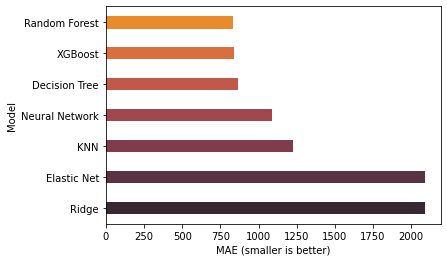

In [50]:
x = ['Ridge', 
     'Elastic Net', 
     'KNN', 
     'Neural Network', 
     'Decision Tree', 
     'XGBoost', 
     'Random Forest']


y = [2089.1086555695683,
    2087.569018947217,
    1224.8014039322697,
    1089.5484014133422,
    865.9582429515906,
    836.7042721608632,
    831.8606409444475]

colors = ["#392834", "#5a3244", "#7e3c4d", "#a1484f", 
          "#c05949", "#d86f3d", "#e88b2b", "#edab06"]

fig, ax = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
ax.set(xlabel="MAE (smaller is better)", ylabel="Model");

The best model is **Random Forest** and the worst model is **Ridge** & **Elastic Net**. We can see that the difference in MAE between the best model and the worst model is significant; the best model **151%** less of the error of the worst model.